In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import datetime

data = pd.read_excel('daily.xlsx')

In [ ]:
import numpy as np

In [ ]:
data

,max_hum,wind_mag,temp,sun_dur,relative_hum,min_hum,dew_point,radiation,zenith_rad,zenith_deg,ws_rad,ws_deg,zenit açısı cos,max_temp,min_temp,max_sun_dur,min_sun_dur
0,87.555556,0.722222,-3.255556,0.000000,86.444444,84.555556,-5.188889,1230.0,1.063910,60.957570,1.227680,70.340902,0.485457,-2.8,-3.8,0.0,0.0
1,60.111111,1.233333,-5.188889,0.855556,59.222222,54.111111,-14.444444,2030.0,1.065760,61.063570,1.229084,70.421349,0.483839,-4.0,-7.2,1.0,0.0
2,26.444444,0.500000,-3.500000,0.122222,26.111111,22.777778,-4.588889,1260.0,1.067765,61.178401,1.230603,70.508382,0.482084,-2.8,-5.2,0.6,0.0
3,70.555556,0.900000,-5.733333,0.111111,65.555556,60.444444,4.777778,2380.0,1.069922,61.302017,1.232236,70.601941,0.480193,-0.4,-11.9,0.6,0.0
4,33.333333,2.066667,6.366667,0.200000,30.333333,23.666667,2.644444,1340.0,1.072232,61.434368,1.233982,70.701959,0.478165,7.9,4.3,0.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,80.888889,2.811111,3.688889,0.000000,80.000000,75.888889,-0.588889,510.0,1.056996,60.561403,1.222417,70.039323,0.491491,4.6,2.3,0.0,0.0
1091,81.777778,0.611111,2.666667,0.000000,79.222222,77.777778,0.650000,640.0,1.058065,60.622679,1.223233,70.086064,0.490559,3.7,1.4,0.0,0.0
1092,89.125000,0.625000,2.300000,0.000000,89.125000,87.375000,0.177778,590.0,1.059292,60.692965,1.224168,70.139634,0.489490,2.8,0.9,0.0,0.0
1093,69.111111,2.844444,6.122222,0.000000,66.222222,60.777778,1.160000,760.0,1.060676,60.772230,1.225221,70.199994,0.488283,8.9,4.2,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

data=data.drop(['zenith_deg'], axis=1)
data=data.drop(['ws_deg'], axis=1)

data=data.drop(['zenit açısı cos'], axis=1)
# data=data.drop(['zenit açısı'], axis=1)
# data=data.drop(['derws'], axis=1)
# data.insert(0, 'day_num', list(range(0, 1095)))
data['date'] = pd.date_range(start='1/1/2017', periods=len(data), freq='D')
# data['year'] = data.date.dt.year
data['month'] = data.date.dt.month
data['day'] = data.date.dt.day
data=data.drop(['date'], axis=1)

In [ ]:
data


,max_hum,wind_mag,temp,sun_dur,relative_hum,min_hum,dew_point,radiation,zenith_rad,ws_rad,max_temp,min_temp,max_sun_dur,min_sun_dur,month,day
0,87.555556,0.722222,-3.255556,0.000000,86.444444,84.555556,-5.188889,1230.0,1.063910,1.227680,-2.8,-3.8,0.0,0.0,1,1
1,60.111111,1.233333,-5.188889,0.855556,59.222222,54.111111,-14.444444,2030.0,1.065760,1.229084,-4.0,-7.2,1.0,0.0,1,2
2,26.444444,0.500000,-3.500000,0.122222,26.111111,22.777778,-4.588889,1260.0,1.067765,1.230603,-2.8,-5.2,0.6,0.0,1,3
3,70.555556,0.900000,-5.733333,0.111111,65.555556,60.444444,4.777778,2380.0,1.069922,1.232236,-0.4,-11.9,0.6,0.0,1,4
4,33.333333,2.066667,6.366667,0.200000,30.333333,23.666667,2.644444,1340.0,1.072232,1.233982,7.9,4.3,0.9,0.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,80.888889,2.811111,3.688889,0.000000,80.000000,75.888889,-0.588889,510.0,1.056996,1.222417,4.6,2.3,0.0,0.0,12,27
1091,81.777778,0.611111,2.666667,0.000000,79.222222,77.777778,0.650000,640.0,1.058065,1.223233,3.7,1.4,0.0,0.0,12,28
1092,89.125000,0.625000,2.300000,0.000000,89.125000,87.375000,0.177778,590.0,1.059292,1.224168,2.8,0.9,0.0,0.0,12,29
1093,69.111111,2.844444,6.122222,0.000000,66.222222,60.777778,1.160000,760.0,1.060676,1.225221,8.9,4.2,0.0,0.0,12,30


In [ ]:
# data['radiation'] = data['radiation'].shift(1)
# data

In [ ]:
data=data.dropna()
y = data["radiation"]
X = data.drop(['radiation'], axis=1).astype('float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25
                                                    )
data

,max_hum,wind_mag,temp,sun_dur,relative_hum,min_hum,dew_point,radiation,zenith_rad,ws_rad,max_temp,min_temp,max_sun_dur,min_sun_dur,month,day
0,87.555556,0.722222,-3.255556,0.000000,86.444444,84.555556,-5.188889,1230.0,1.063910,1.227680,-2.8,-3.8,0.0,0.0,1,1
1,60.111111,1.233333,-5.188889,0.855556,59.222222,54.111111,-14.444444,2030.0,1.065760,1.229084,-4.0,-7.2,1.0,0.0,1,2
2,26.444444,0.500000,-3.500000,0.122222,26.111111,22.777778,-4.588889,1260.0,1.067765,1.230603,-2.8,-5.2,0.6,0.0,1,3
3,70.555556,0.900000,-5.733333,0.111111,65.555556,60.444444,4.777778,2380.0,1.069922,1.232236,-0.4,-11.9,0.6,0.0,1,4
4,33.333333,2.066667,6.366667,0.200000,30.333333,23.666667,2.644444,1340.0,1.072232,1.233982,7.9,4.3,0.9,0.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,80.888889,2.811111,3.688889,0.000000,80.000000,75.888889,-0.588889,510.0,1.056996,1.222417,4.6,2.3,0.0,0.0,12,11
1091,81.777778,0.611111,2.666667,0.000000,79.222222,77.777778,0.650000,640.0,1.058065,1.223233,3.7,1.4,0.0,0.0,12,12
1092,89.125000,0.625000,2.300000,0.000000,89.125000,87.375000,0.177778,590.0,1.059292,1.224168,2.8,0.9,0.0,0.0,12,13
1093,69.111111,2.844444,6.122222,0.000000,66.222222,60.777778,1.160000,760.0,1.060676,1.225221,8.9,4.2,0.0,0.0,12,14


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(random_state = 42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

886.4798062315721

In [ ]:
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
mape

24.975714511372843

In [ ]:
rf_model = RandomForestRegressor(random_state = 42)

In [ ]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [ ]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [ ]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200)

In [ ]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = rf_tuned.predict(X_test)

In [ ]:
Importance = pd.DataFrame({"Önem Düzeyi": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

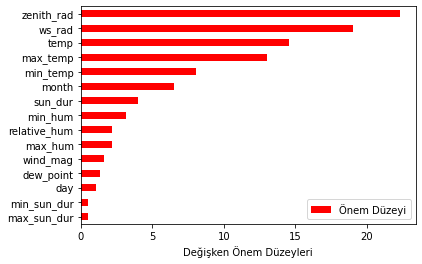

In [ ]:
import matplotlib.pyplot as plt
Importance.sort_values(by = "Önem Düzeyi", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [ ]:
my_rho = np.corrcoef(y_test, y_pred)


In [ ]:
my_rho

array([[1.        , 0.91705441],
       [0.91705441, 1.        ]])

In [ ]:
#data=data.drop(['max_sun_dur'], axis=1)
#data=data.drop(['min_sun_dur'], axis=1)

#data=data.drop(['dew_point'], axis=1)
#data=data.drop(['wind_mag'], axis=1)
#data=data.drop(['min_temp'], axis=1)
#data=data.drop(['sun_dur'], axis=1)
data=data.drop(['ws_rad'], axis=1)
# data=data.drop(['max_hum'], axis=1)
# data=data.drop(['max_hum'], axis=1)
# data=data.drop(['max_hum'], axis=1)
data=data.dropna()

y = data["radiation"]
X = data.drop(['radiation'], axis=1).astype('float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25
                                                    )
data

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100


mape

rf_model = RandomForestRegressor(random_state = 42)

rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200)

rf_tuned.fit(X_train, y_train)

y_pred = rf_tuned.predict(X_test)

my_rho = np.corrcoef(y_test, y_pred)

rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred) / y_test)), axis=0))
rmspe


0.9018131958400588

In [ ]:
mape

42.48758102611857

In [ ]:
rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred) / y_test)), axis=0))
rmspe

1.0378620047759946